# Problem Statement : What distinguishes Oscar-winning movies from others? Can we profile common characteristics using clustering and feature analysis?

# 1. Problem Statement

What traits set Oscar-winning movies apart from others?
We aim to identify meaningful clusters of films and explore the characteristics that commonly define Oscar-winning ones.

# 2. Data Sources

IMDb Movie Metadata (Swathi.csv)

Oscar Awards & Categories (Cleaned_Felix.csv)

# 3. Methodology

Preprocess numeric and categorical features

Use OneHotEncoding + StandardScaler

Apply KMeans clustering

Visualize using PCA (2D)

Compare clusters by oscar_winner ratio

# 4. Key Metrics & Tools

Features: IMDb Rating, Runtime, Genres, Year, Num Votes

Models: KMeans, PCA

Tools: Python, Pandas, Scikit-Learn, Seaborn, Matplotlib

# 5. Expected Insights

Clusters with high Oscar-winning density

Common profile: e.g., Drama/Romance, higher IMDb, longer runtime

Possibly surprising patterns: e.g., some genres rarely win

In [16]:
import pandas as pd
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

In [17]:
# Load data
felix_df = pd.read_csv("../data/Cleaned_Felix.csv")
swathi_df = pd.read_csv("../data/Swathi.csv")


In [18]:
# Merge datasets
felix_df['film'] = felix_df['film'].str.lower().str.strip()
swathi_df['Title'] = swathi_df['Title'].str.lower().str.strip()
merged_df = pd.merge(swathi_df, felix_df[['film', 'status']], left_on='Title', right_on='film', how='left')
merged_df['oscar_winner'] = merged_df['status'].fillna('Not Won').apply(lambda x: 1 if x == 'Won' else 0)
merged_df.drop(columns=['film', 'status'], inplace=True)

In [19]:
merged_df.head()

,Position,Const,Created,Modified,Description,Title,Original Title,URL,Title Type,IMDb Rating,Runtime (mins),Year,Genres,Num Votes,Release Date,Directors,oscar_winner
0,1,tt0018578,2021-03-25,2021-03-25,NaN,wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,144.0,1927,"Drama, Romance, War, Action",15336,1929-01-05,"William A. Wellman, Harry d'Abbadie d'Arrast",1
1,1,tt0018578,2021-03-25,2021-03-25,NaN,wings,Wings,https://www.imdb.com/title/tt0018578/,Movie,7.5,144.0,1927,"Drama, Romance, War, Action",15336,1929-01-05,"William A. Wellman, Harry d'Abbadie d'Arrast",1
2,2,tt0019304,2021-03-25,2021-03-25,NaN,the racket,The Racket,https://www.imdb.com/title/tt0019304/,Movie,6.6,84.0,1928,"Crime, Drama, Film-Noir",1727,1928-11-01,Lewis Milestone,0
3,3,tt0018379,2021-03-25,2021-03-25,NaN,7th heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,110.0,1927,"Drama, Romance",4403,1927-10-30,Frank Borzage,1
4,3,tt0018379,2021-03-25,2021-03-25,NaN,7th heaven,7th Heaven,https://www.imdb.com/title/tt0018379/,Movie,7.5,110.0,1927,"Drama, Romance",4403,1927-10-30,Frank Borzage,0


In [20]:
features = ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes', 'Genres', 'Title Type']
model_df = merged_df[features + ['oscar_winner']].dropna()

numeric_features = ['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']
categorical_features = ['Genres', 'Title Type']

In [47]:
model_df.head()

,IMDb Rating,Runtime (mins),Year,Num Votes,Genres,Title Type,oscar_winner,cluster,PCA1,PCA2
0,7.5,144.0,1927,15336,"Drama, Romance, War, Action",Movie,1,2,-0.334791,1.845655
1,7.5,144.0,1927,15336,"Drama, Romance, War, Action",Movie,1,2,-0.334791,1.845655
2,6.6,84.0,1928,1727,"Crime, Drama, Film-Noir",Movie,0,0,-1.654208,0.846906
3,7.5,110.0,1927,4403,"Drama, Romance",Movie,1,2,-0.701558,1.361784
4,7.5,110.0,1927,4403,"Drama, Romance",Movie,0,2,-0.701558,1.361784


In [21]:
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])
categorical_transformer = Pipeline(steps=[('encoder', OneHotEncoder(handle_unknown='ignore'))])

preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

In [22]:
X = model_df[features]
X_preprocessed = preprocessor.fit_transform(X)

In [23]:
kmeans = KMeans(n_clusters=5, n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_preprocessed)
X_dense = X_preprocessed.toarray()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_dense)

model_df['cluster'] = clusters
model_df['PCA1'] = X_pca[:, 0]
model_df['PCA2'] = X_pca[:, 1]

C:\Users\swath\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\swath\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\Users\swath\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\swath\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\Users\swath\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

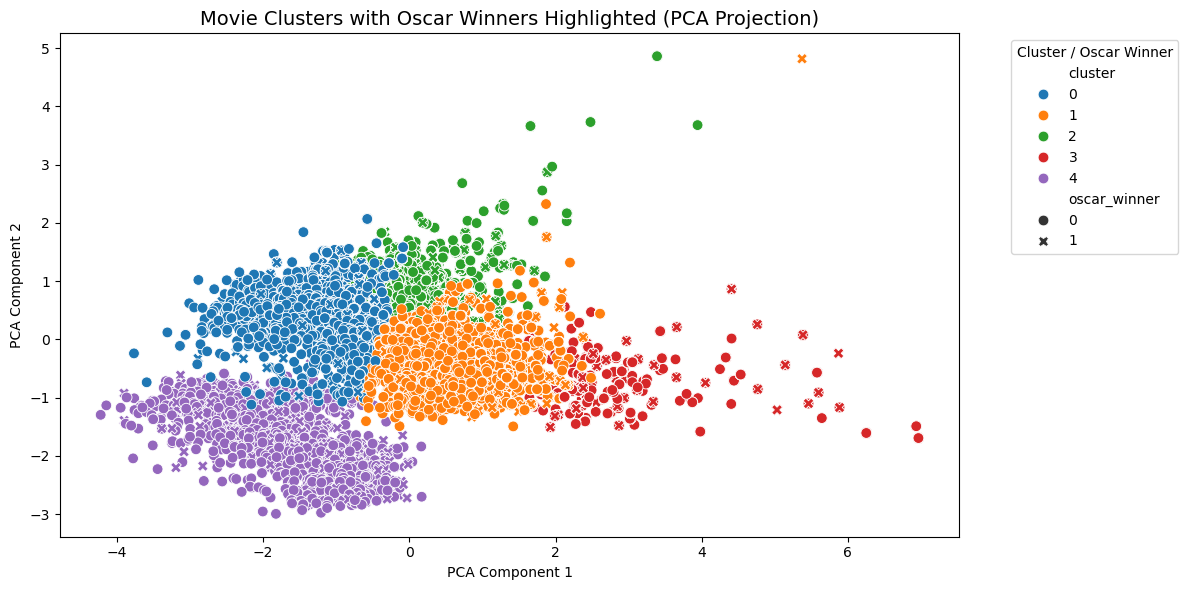

In [24]:
plt.figure(figsize=(12, 6))
sns.scatterplot(data=model_df, x='PCA1', y='PCA2', hue='cluster', style='oscar_winner', palette='tab10', s=60)
plt.title('Movie Clusters with Oscar Winners Highlighted (PCA Projection)', fontsize=14)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster / Oscar Winner', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [25]:
# Oscar-winning percentage and cluster traits
cluster_win_ratio = model_df.groupby('cluster')['oscar_winner'].agg(['count', 'sum'])
cluster_win_ratio['win_rate'] = (cluster_win_ratio['sum'] / cluster_win_ratio['count']).round(3)

trait_summary = model_df.groupby('cluster')[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']].mean().round(2)
summary_combined = trait_summary.join(cluster_win_ratio[['win_rate']])
summary_combined.sort_values(by='win_rate', ascending=False)


,IMDb Rating,Runtime (mins),Year,Num Votes,win_rate
cluster,,,,,
3,8.26,137.78,2002.66,1159410.11,0.354
2,7.55,127.23,1956.94,56312.15,0.232
4,6.70,19.04,1978.14,1432.49,0.207
1,7.36,123.78,2003.52,180126.27,0.183
0,6.38,104.45,1954.82,8825.68,0.131


In [26]:
model_df.groupby('cluster')['Genres'].value_counts().groupby(level=0).head(3).reset_index(name="count")

,cluster,Genres,count
0,0,Drama,159
1,0,"Drama, Romance",152
2,0,"Comedy, Musical, Romance",101
3,1,Drama,299
4,1,"Drama, Romance",220
5,1,"Comedy, Drama",157
6,2,"Drama, Romance",330
7,2,Drama,325
8,2,"Comedy, Drama, Romance",160
9,3,"Crime, Drama",42


In [27]:
#Summary
cluster_win_ratio = model_df.groupby('cluster')['oscar_winner'].agg(['count', 'sum'])
cluster_win_ratio['win_rate'] = (cluster_win_ratio['sum'] / cluster_win_ratio['count']).round(3)
cluster_win_ratio.rename(columns={'count': 'total_movies', 'sum': 'oscar_wins'}, inplace=True)
trait_summary = model_df.groupby('cluster')[['IMDb Rating', 'Runtime (mins)', 'Year', 'Num Votes']].mean().round(2)
summary_combined = trait_summary.join(cluster_win_ratio[['oscar_wins', 'win_rate', 'total_movies']])
summary_combined = summary_combined.sort_values(by='win_rate', ascending=False)

C:\Users\swath\AppData\Local\Temp\ipykernel_21796\3876748454.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_combined.reset_index(), x='cluster', y='win_rate', palette='Blues_d')


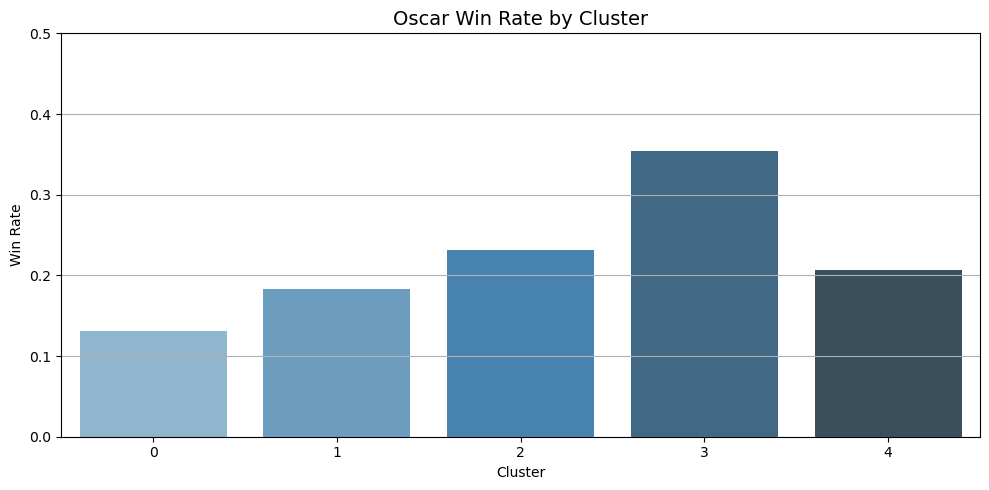

In [28]:
# Visualizations
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_combined.reset_index(), x='cluster', y='win_rate', palette='Blues_d')
plt.title("Oscar Win Rate by Cluster", fontsize=14)
plt.ylabel("Win Rate")
plt.xlabel("Cluster")
plt.ylim(0, 0.5)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_21796\640233829.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_combined.reset_index(), x='cluster', y='IMDb Rating', palette='Greens_d')


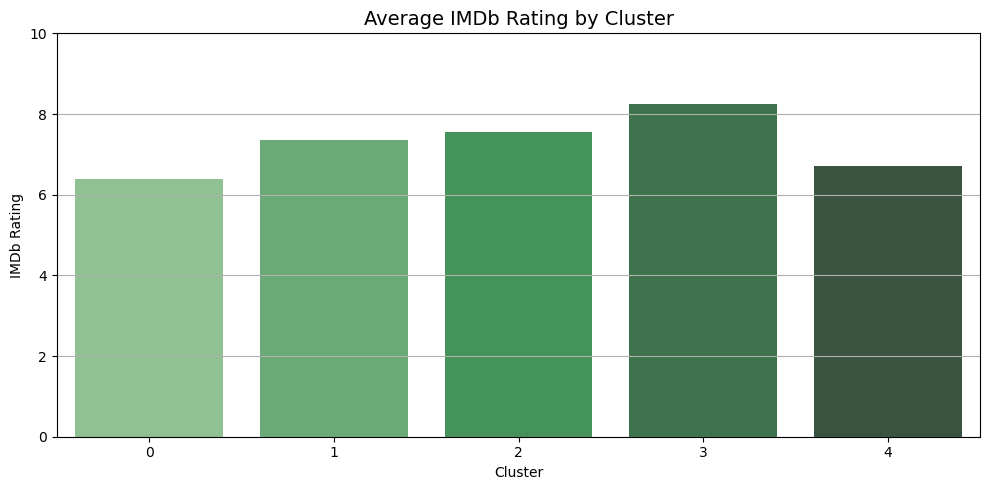

In [29]:
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_combined.reset_index(), x='cluster', y='IMDb Rating', palette='Greens_d')
plt.title("Average IMDb Rating by Cluster", fontsize=14)
plt.ylabel("IMDb Rating")
plt.xlabel("Cluster")
plt.ylim(0, 10)
plt.grid(axis='y')
plt.tight_layout()
plt.show()

C:\Users\swath\AppData\Local\Temp\ipykernel_21796\3743368346.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=summary_combined.reset_index(), x='cluster', y='Runtime (mins)', palette='Oranges_d')


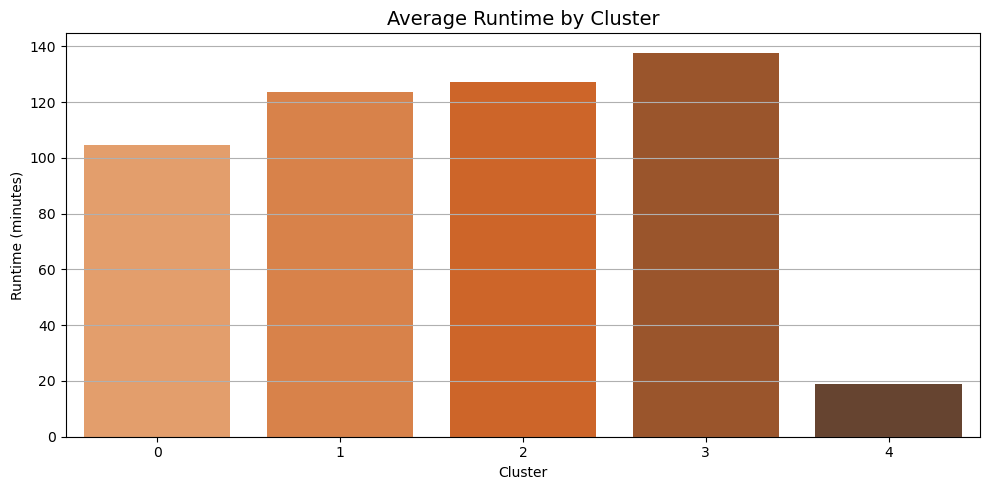

In [30]:
plt.figure(figsize=(10, 5))
sns.barplot(data=summary_combined.reset_index(), x='cluster', y='Runtime (mins)', palette='Oranges_d')
plt.title("Average Runtime by Cluster", fontsize=14)
plt.ylabel("Runtime (minutes)")
plt.xlabel("Cluster")
plt.grid(axis='y')
plt.tight_layout()
plt.show()